# <u> <span style="color:Green;"> Lead Score Case Study</span> <u>



##  *Problem Statement*

- X Education sells online courses to industry professionals. They get leads through their website, referrals, and marketing. The typical lead conversion rate is around 30%. They want to identify the most potential leads, called ‘Hot Leads,’ to improve the conversion rate.


## *Objectives*

- X Education wants to create a logistic regression model that assigns a lead score between 0 and 100 to each lead, allowing the company to identify potential hot leads. A higher score indicates a higher probability of the lead converting, while a lower score suggests the lead is cold and less likely to convert. The lead score will enable the sales team to focus on the most promising leads, thus increasing the lead conversion rate.

- To build the logistic regression model, X Education will use factors such as the lead's source, activity on the website, and communication history. By considering these factors, the model will predict the probability of the lead converting and assign a lead score accordingly. This lead score can then be used to prioritize follow-up communication efforts by the sales team, leading to a more efficient lead conversion process.


In [1]:
# Importing necessary libraries
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Setting Max column display option
pd.set_option('display.max_columns', 500)

In [2]:
# Reading the dataset with the help of Pandas Library
df = pd.read_csv("Leads.csv")

## *1) Inspecting the Data Frame*

In [3]:
# Checking the head of dataset to grab an understanding of the data
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Exploring different info available about the data for instance data types and so on
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
df.shape

(9240, 37)

## *2) Data Preparation*

In [6]:
# Checking for duplicate values

df.duplicated(subset = ["Prospect ID"], keep = False).sum()

0

In [7]:
df.duplicated(subset = ["Lead Number"], keep = False).sum()

0

In [8]:
# Dropping columns Prospect ID and Lead Number as they are mere unique ID of the customers


df.drop(["Prospect ID", "Lead Number"], axis = 1, inplace = True)

In [9]:
df.shape

(9240, 35)

In [10]:
# Code for checking select category in different variable because "select" is equivalent to null value in this case 

df = df.replace("Select", np.nan)

- We have converted select category to null value because "Select" simply means that the consumer has not entered any value there so that way we can say "Select" is equivalent to null value in this case.

In [11]:
# Checking for null values after converting select category to null values.

df.isna().sum()/df.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [12]:
# Dropping columns with more than 45% of null values.

null_df = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
null_df.columns = ["Variables", "Percentage"]
high_null_df = null_df[null_df.Percentage>=45]
null_df_var = [x for x in high_null_df.Variables]
df.drop([x for x in null_df_var], axis = 1, inplace = True)

In [13]:
# Checking data head again after making above changes in the data set

df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


In [14]:
# Finding variables which have only one category.

not_unique = pd.DataFrame(df.nunique()).reset_index()
not_unique.columns = ["Vars","Count"]
not_unique = not_unique[not_unique.Count == 1]
nu_list = [x for x in not_unique["Vars"]]

In [15]:
# Dropping all the columns which have no unique category as they are of no help.

df.drop([x for x in nu_list], axis = 1, inplace = True)

- We have dropped the columns which have only one response for instance column "Magazine" has only one values which is "No" that being said we can clearly infer that there's nothing to gain from these columns.

In [16]:
# Checking for columns with null values again after dropping columns with greater than or equal to 45% null values.

df.isna().sum()/df.shape[0]*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [17]:
# Finding out column names with null values more than or equal to 25%

null_df = pd.DataFrame(df.isna().sum()/df.shape[0]*100).reset_index()
null_df.columns = ["Variables", "Percentage"]
high_null_df = null_df[null_df.Percentage>=25]
null_df_var = [x for x in high_null_df.Variables]


In [18]:
# Converting null values in the columns with more than 25% null values to "Not Mentioned" category

for i in null_df_var:
    df[i] = df[i].fillna("Not Mentioned")

In [19]:
# Checking for null values again after replacing null values in certain columns into "Not Mentioned" category

df.isna().sum()/df.shape[0]*100

Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [20]:
# Let's see how much of the data in percenttage will be lost if we remove those particular rows with null values

sum((df.isna().sum(axis = 1)>1)/df.shape[0])*100

1.4826839826839802

- As we can see around 1.48% of the data will be lost in total if we remove these rows with null values

In [21]:
# Removing rows with null values

df = df[df.isna().sum(axis = 1)<1]

In [22]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not Mentioned,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Mentioned,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


In [23]:
# Checking for the percentage of null values again in the dataset

df.isna().sum()/df.shape[0]*100

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

- Now we can see clearly that we are left with no null values.

In [24]:
# Checking for the shape of the data again

df.shape

(9074, 23)

- Now we are left with 9074 rows

In [25]:
# Checking for all the categorical variables and their values

cat_var = [x for x in df.select_dtypes(include = "object").columns]
for x in cat_var:
    print(df[x].value_counts())
    print("-"*60)

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
------------------------------------------------------------
Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
------------------------------------------------------------
No     8358
Yes     716
Name: Do Not Email, dtype: int64
------------------------------------------------------------
No     9072
Yes       

In [26]:
# Checking for Country column explicitly 

df["Country"].value_counts()

India                   6491
Not Mentioned           2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

- As we can infer from the above value count of "Country" column that mojority of share count is from "India" and at the same time "Not Mentioned" is equivalent to null values moreover rest all the countries have really small share count individually so we can decide to merge these all countries except india and name it under the category outside India

In [27]:
# Converting values into 3 categories namely "India", "Not Mentioned", "Outside India"

l = list(set([x for x in df.Country]))
l = [x for x in l if x not in ["India", "Not Mentioned"]]
df["Country"] = df["Country"].replace(l , "Outside India")

In [28]:
# Checking the desired output

df["Country"].value_counts()

India            6491
Not Mentioned    2296
Outside India     287
Name: Country, dtype: int64

## *3) Exploratory Data Analysis*

### Univariate Analysis

- Categorical Variables

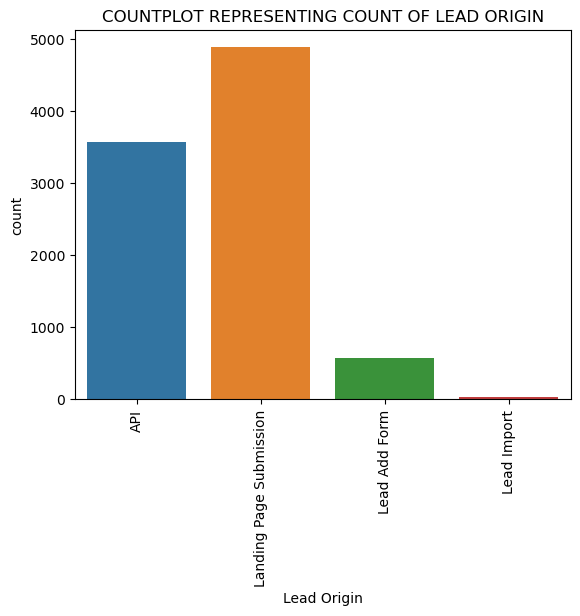

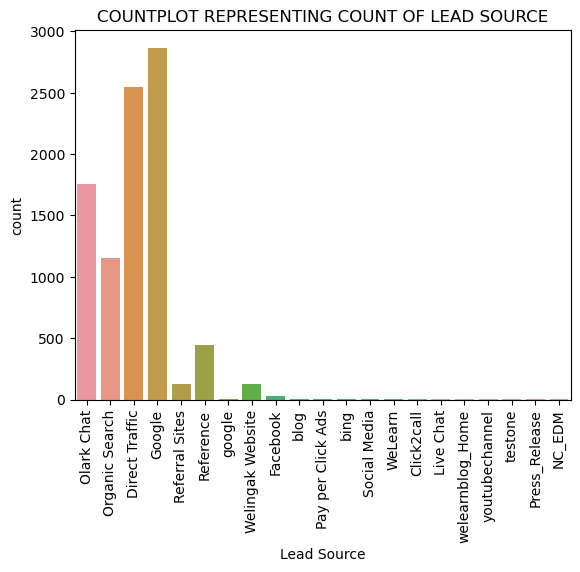

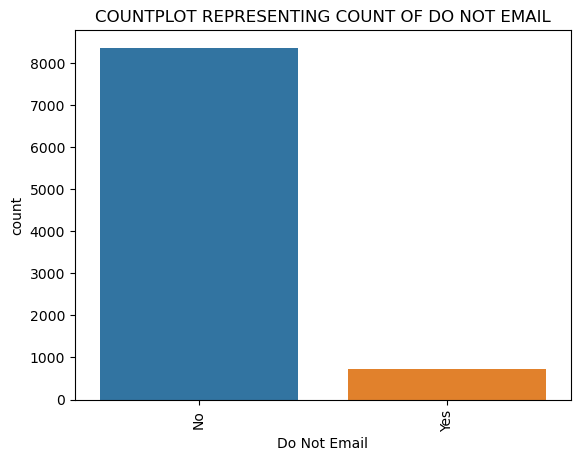

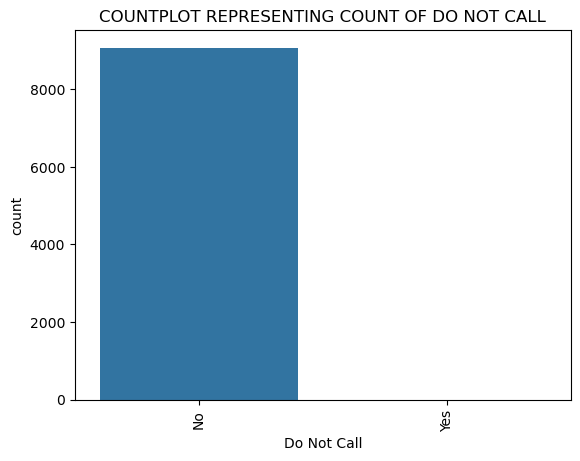

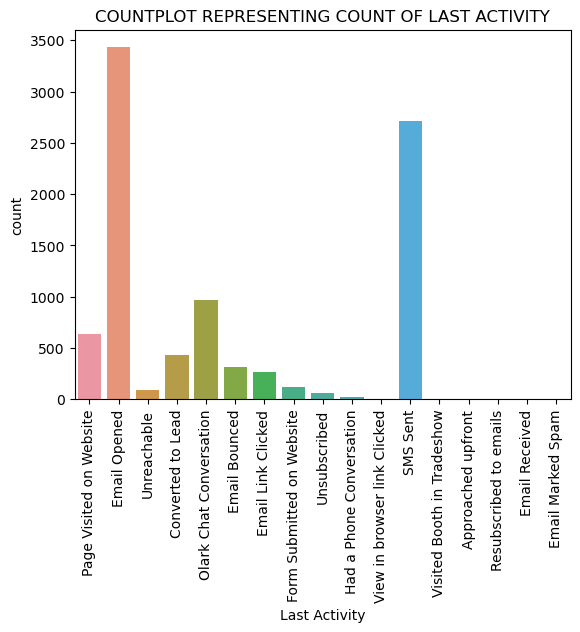

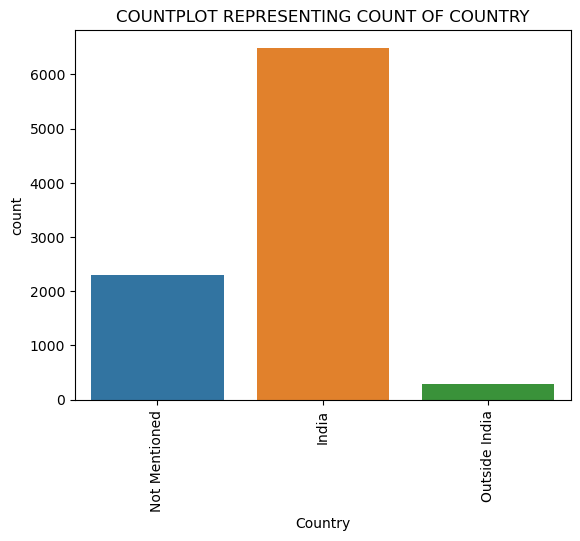

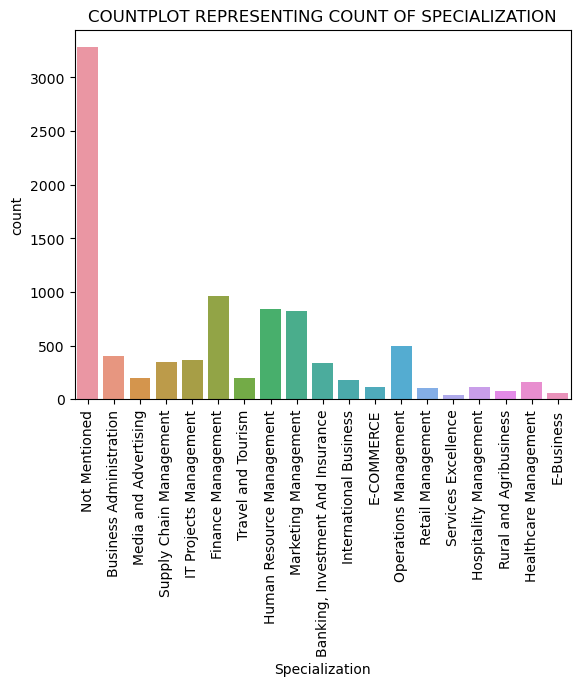

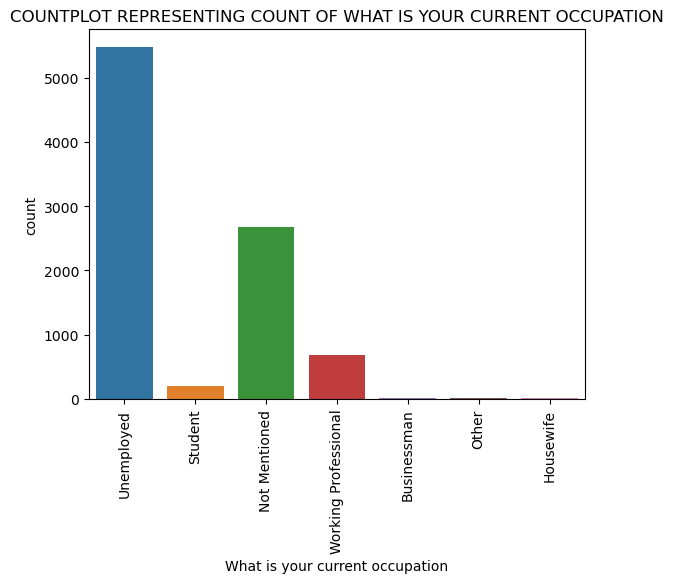

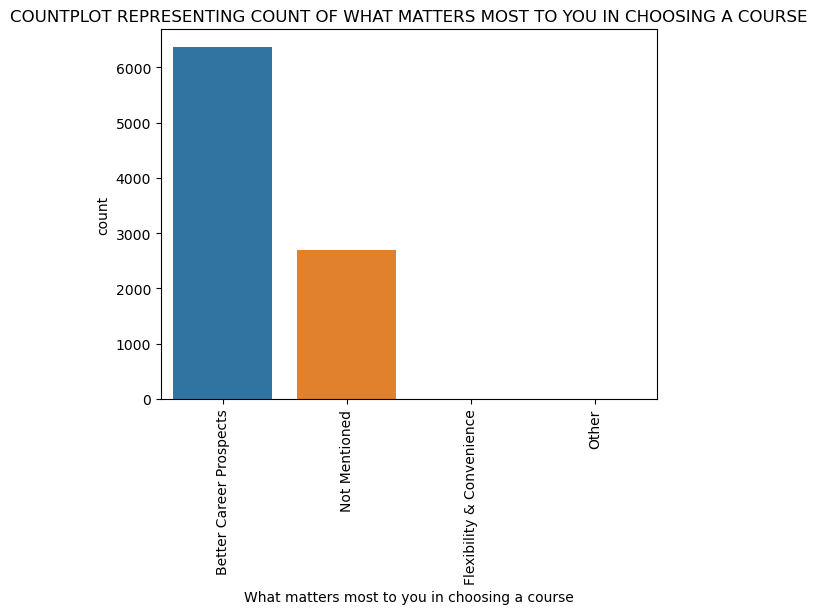

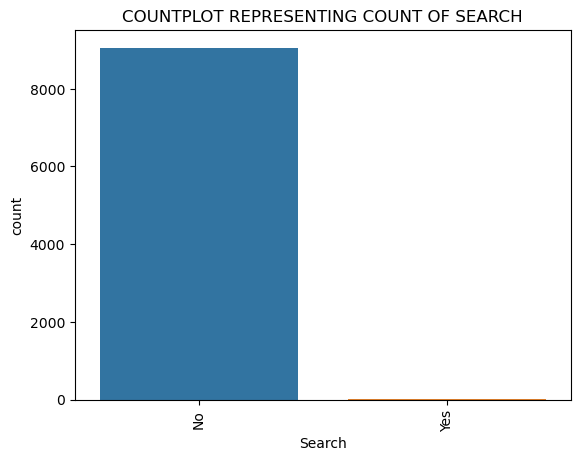

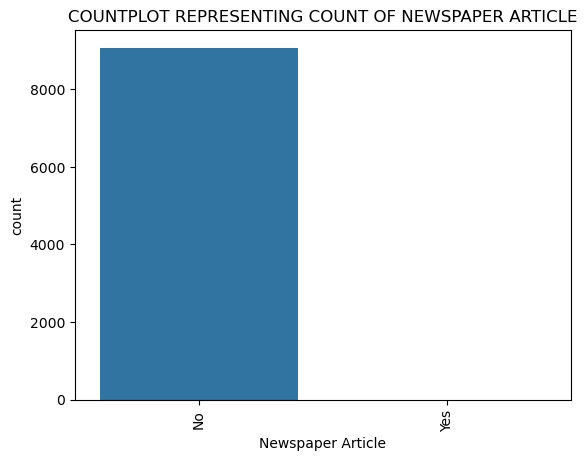

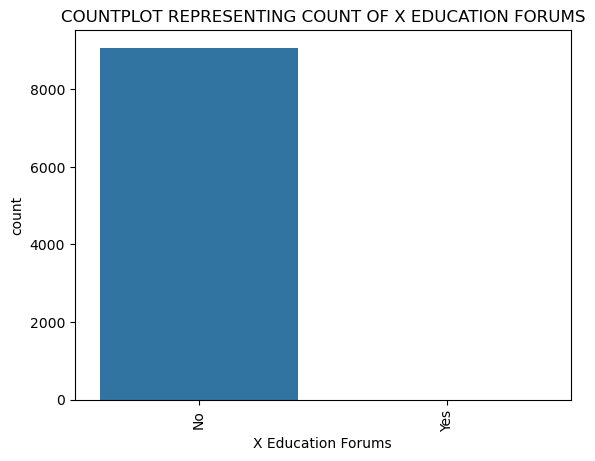

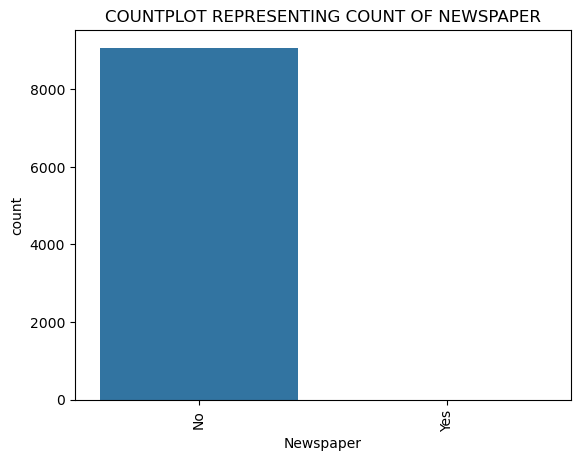

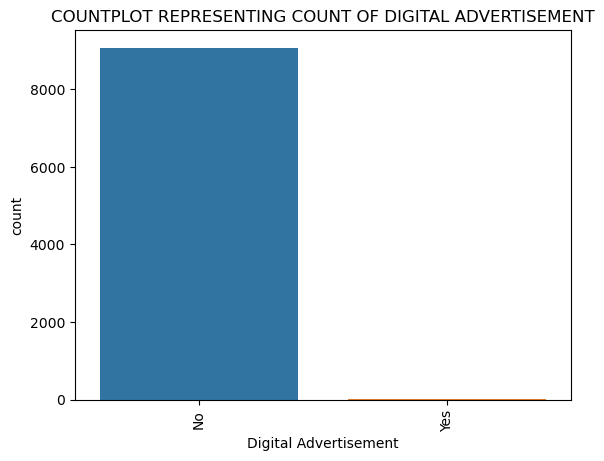

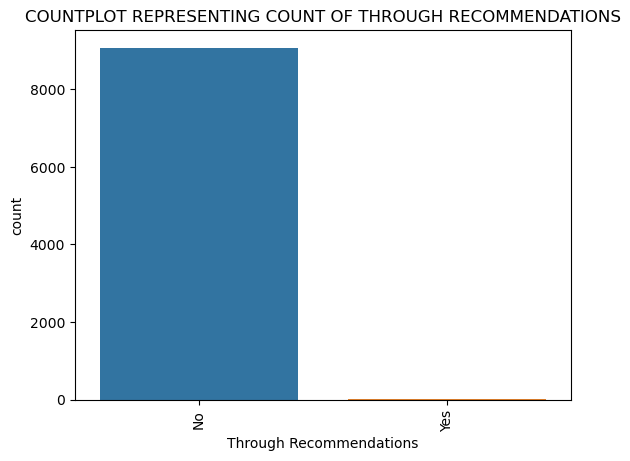

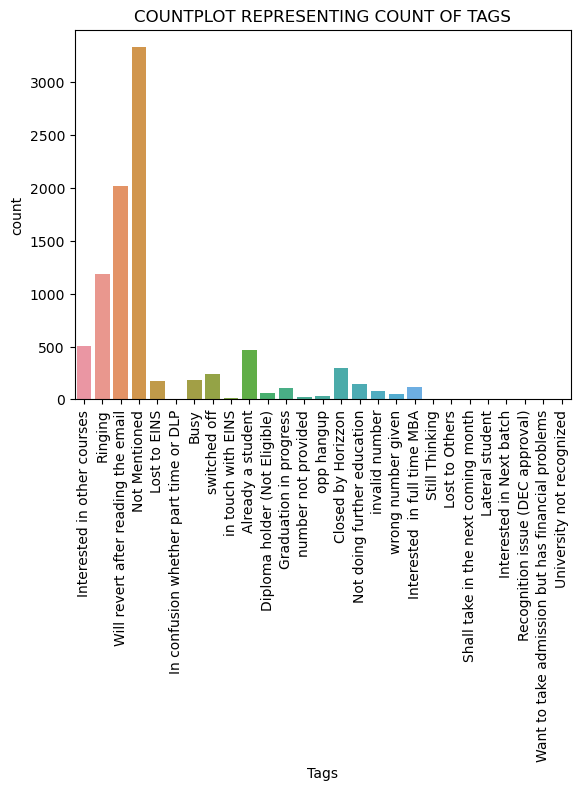

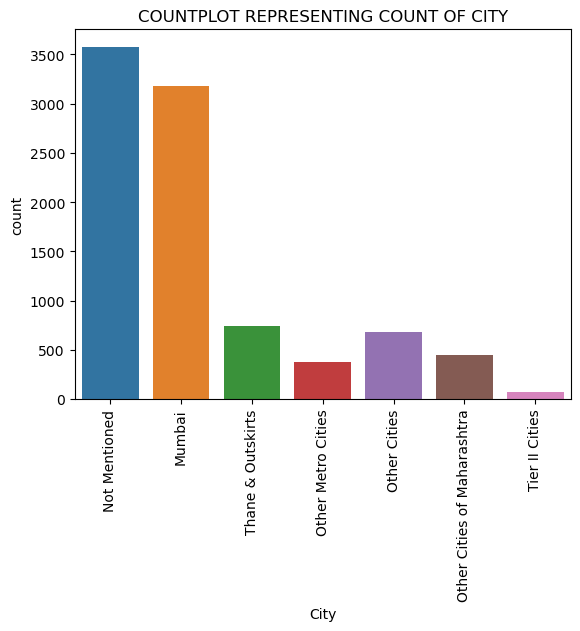

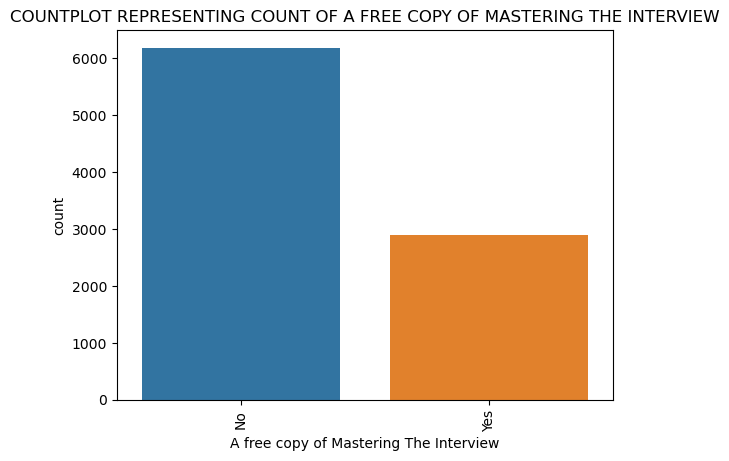

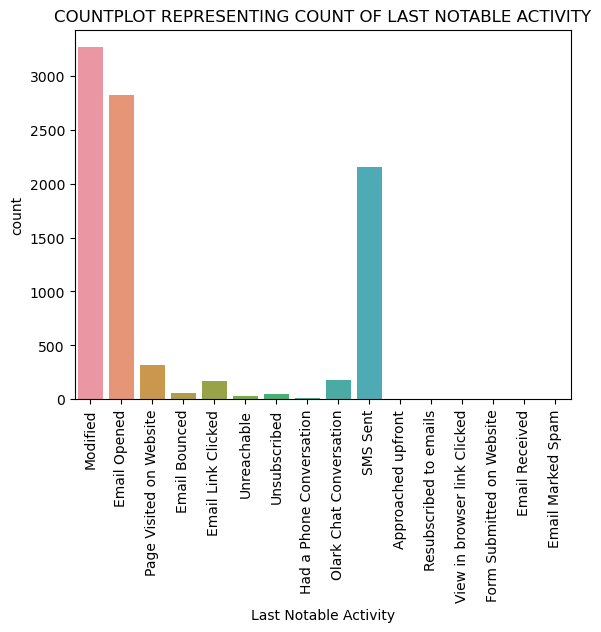

In [29]:
# Ploting bar charts for categorical variables 

cat_list = [x for x in df.select_dtypes(include = "object")]

for x in cat_list:
    sns.countplot(data = df, x = x)
    plt.xticks(rotation = 90)
    plt.title("Countplot representing Count of ".upper() + x.upper())
    plt.show()


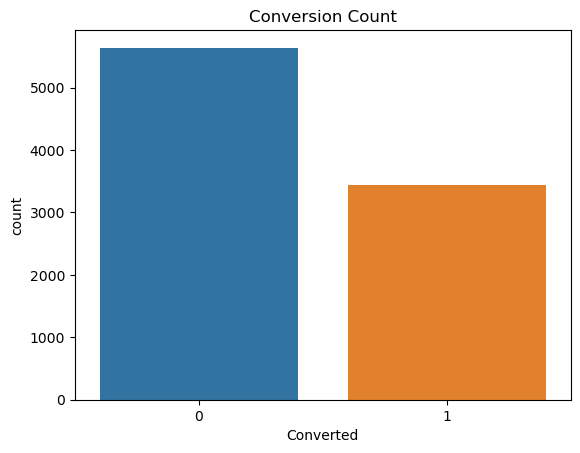

In [30]:
# Now checking count of Converted column which is the target variable(Y variable) in our case study

sns.countplot(df["Converted"])
plt.title("Conversion Count")
plt.show()

## <span style = "color: Red;"> Checking Relation of  Categorical Variables with Target Variable </span>

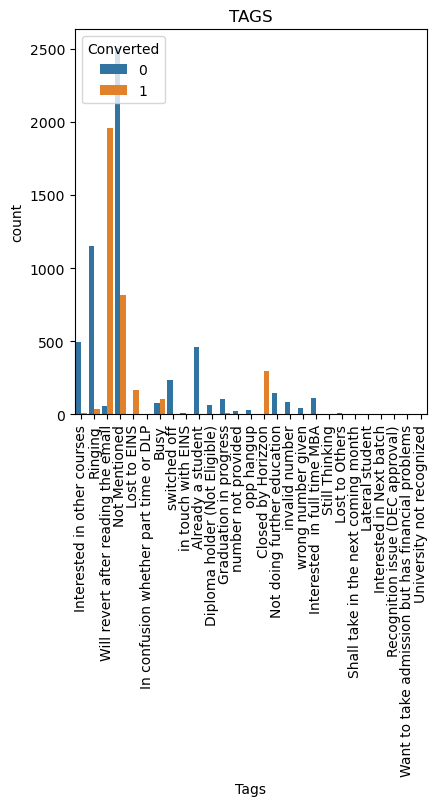

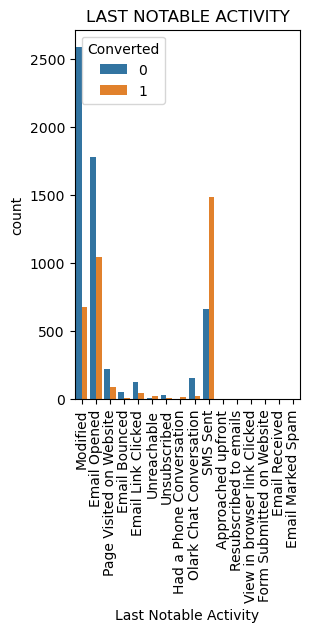

In [31]:
# Checking for relation of Target variable with Tags and "Last Notable Acitivity" variable

plt.figure(figsize= (10,5))

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = "Tags", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Tags".upper())
plt.show()

plt.subplot(1, 2, 2)
sns.countplot(data = df, x = "Last Notable Activity", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Last Notable Activity".upper())
plt.show()

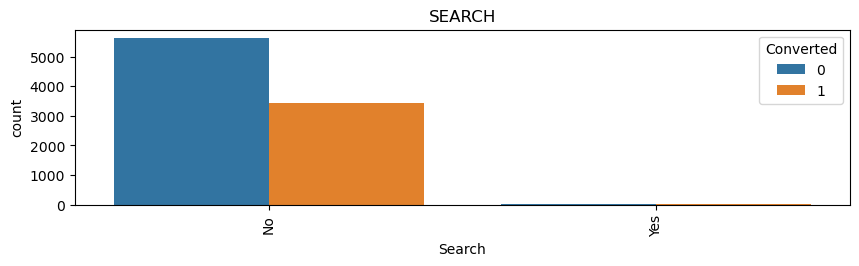

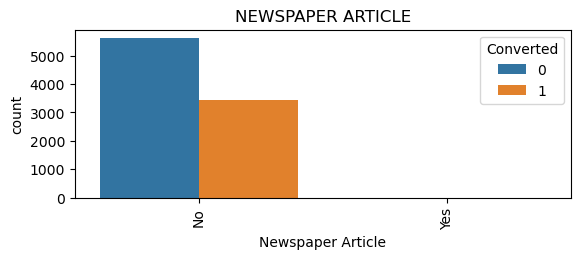

In [32]:
# Checking for relation of Target variable with "Newspaper Article" and "Search" variable

plt.figure(figsize= (10,5))

plt.subplot(2, 1, 1)
sns.countplot(data = df, x = "Search", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Search".upper())
plt.show()

plt.subplot(2, 1, 2)
sns.countplot(data = df, x = "Newspaper Article", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Newspaper Article".upper())
plt.show()

In [33]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Mentioned,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Not Mentioned,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Mentioned,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Not Mentioned,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified


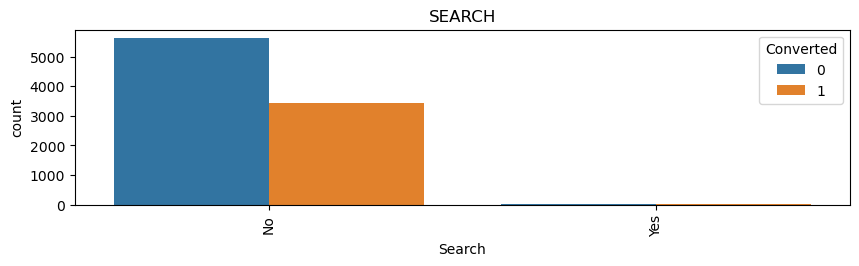

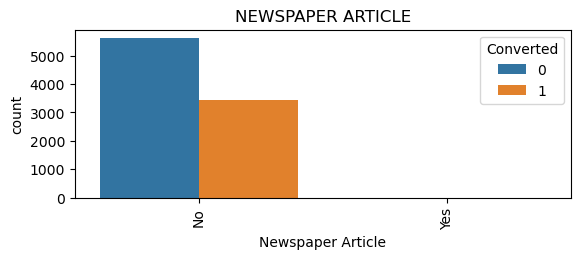

In [34]:
plt.figure(figsize= (10,5))

plt.subplot(2, 1, 1)
sns.countplot(data = df, x = "Search", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Search".upper())
plt.show()

plt.subplot(2, 1, 2)
sns.countplot(data = df, x = "Newspaper Article", hue = "Converted")
plt.xticks(rotation = 90)
plt.title("Newspaper Article".upper())
plt.show()

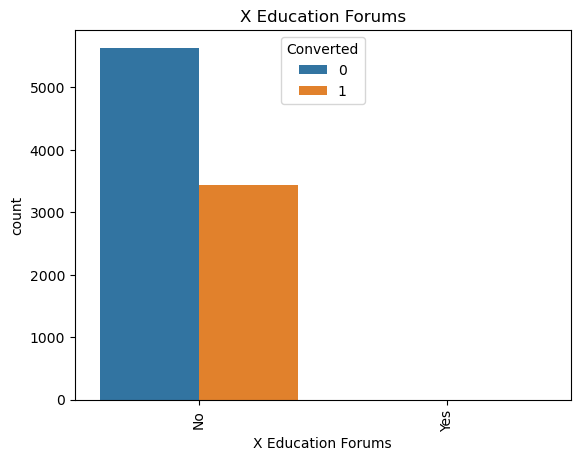

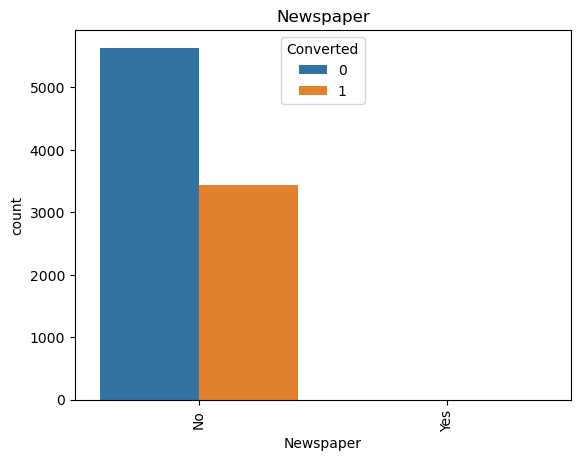

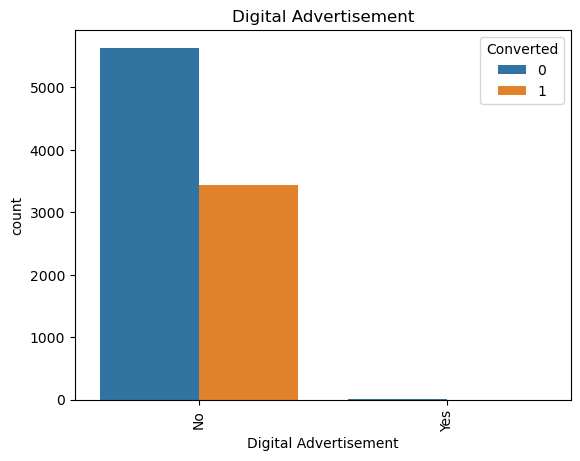

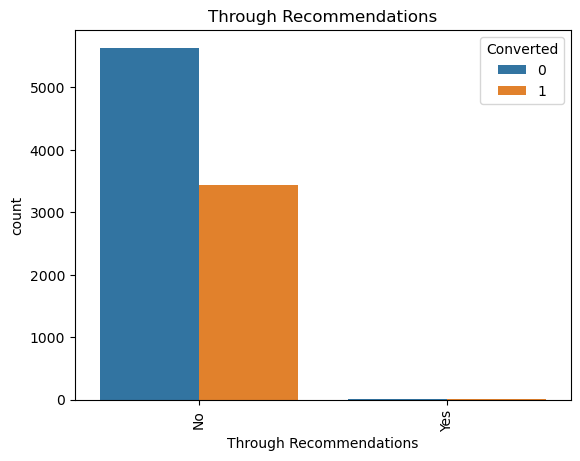

In [35]:
var_col = ["X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations"]

for x in var_col:
    sns.countplot(data = df, hue = "Converted", x = x)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()

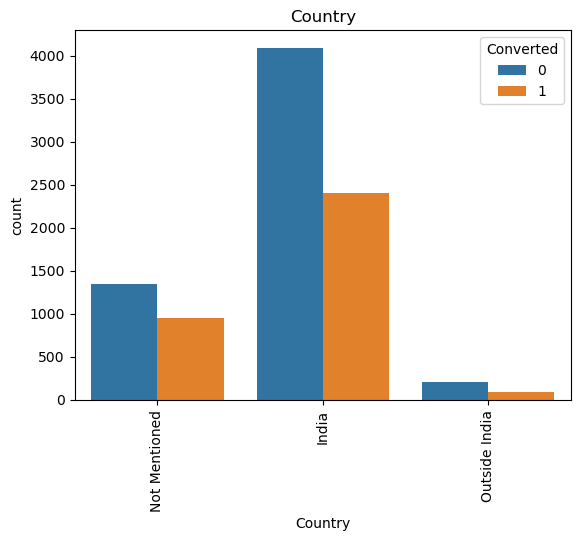

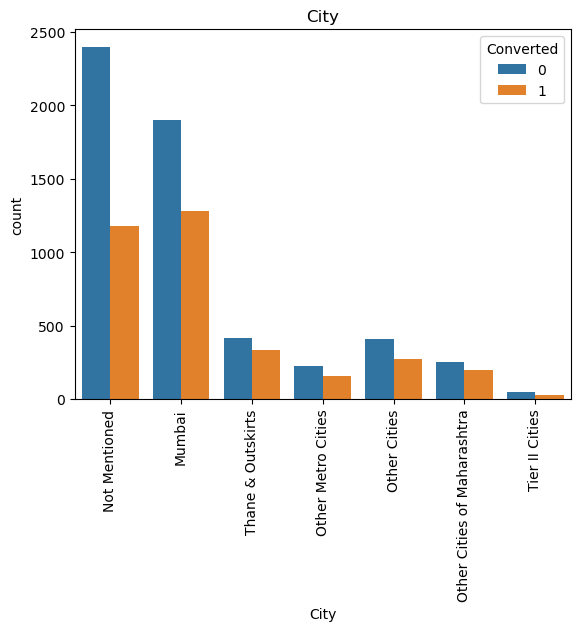

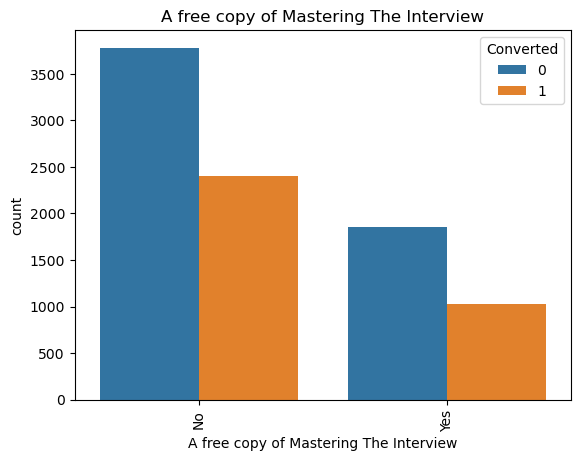

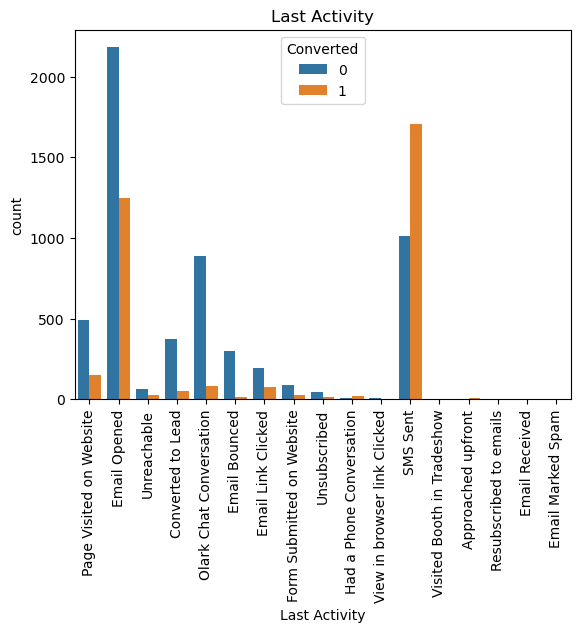

In [36]:
var_col_1 = ["Country", "City", "A free copy of Mastering The Interview", "Last Activity"]

for x in var_col_1:
    sns.countplot(data = df, hue = "Converted", x = x)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()


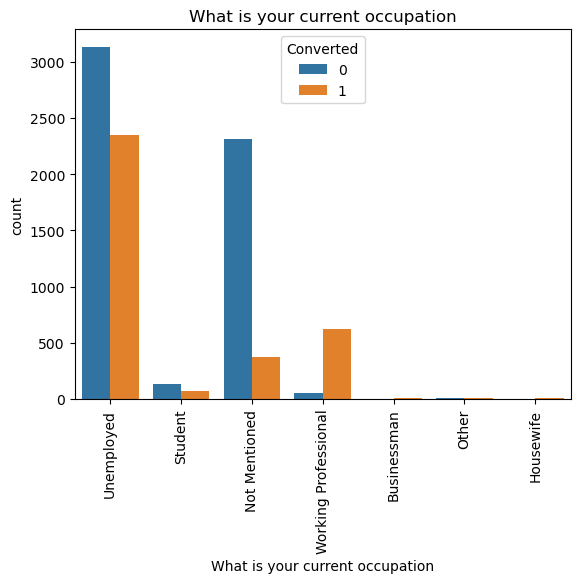

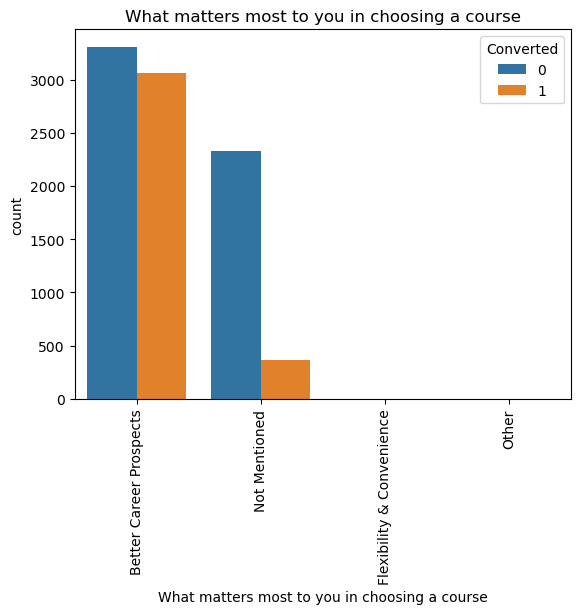

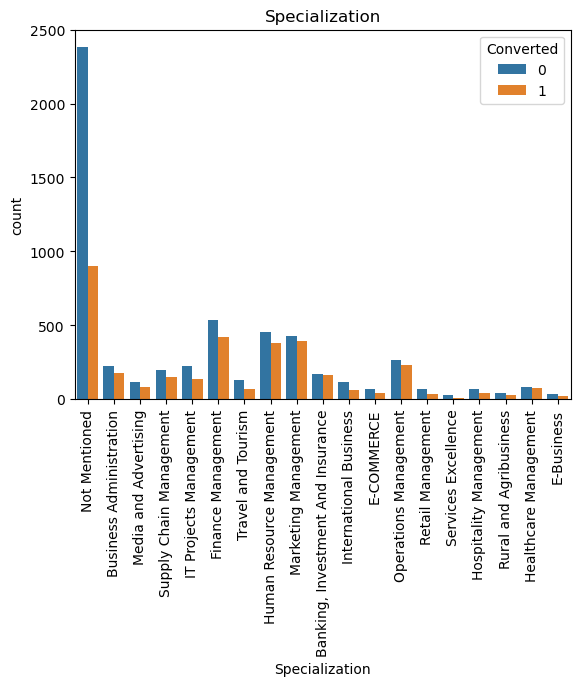

In [37]:
var_col_2 = ["What is your current occupation", "What matters most to you in choosing a course", "Specialization"]

for x in var_col_2:
    sns.countplot(data = df, hue = "Converted", x = x)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()

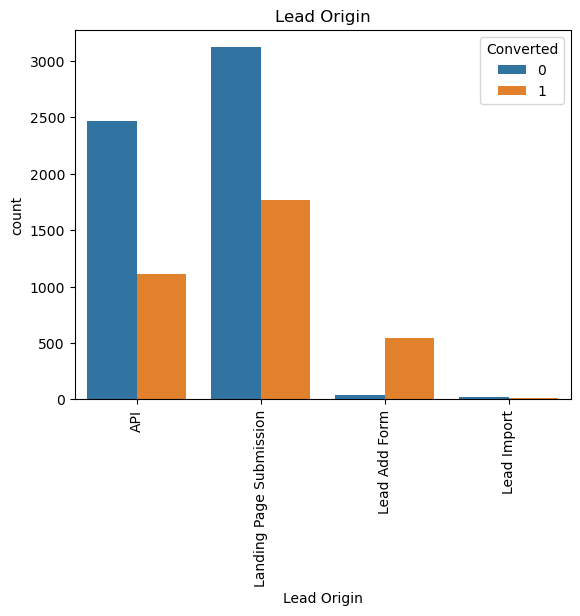

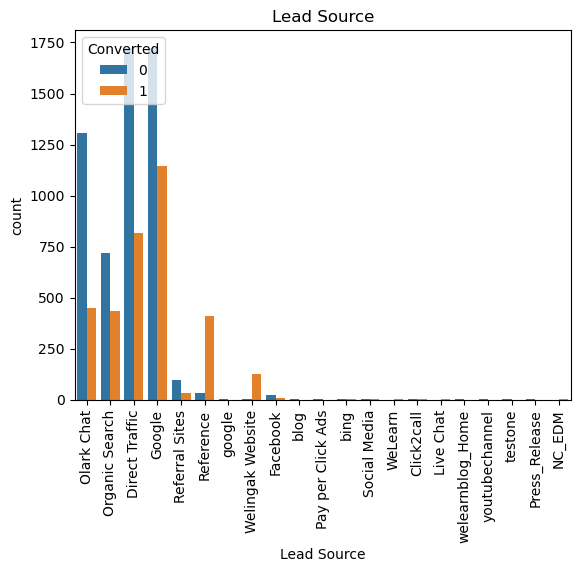

In [38]:
var_col_3 = ["Lead Origin", "Lead Source"]

for x in var_col_3:
    sns.countplot(data = df, hue = "Converted", x = x)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()

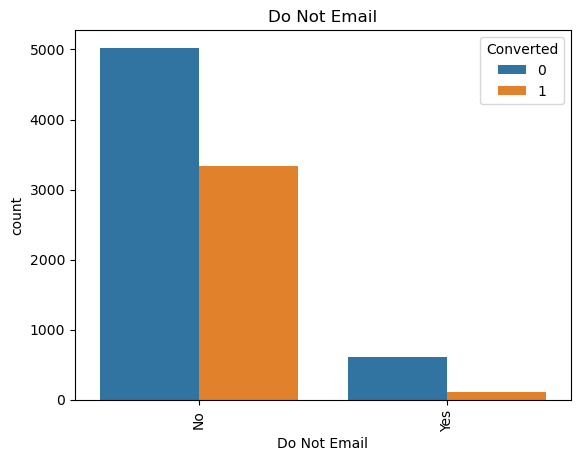

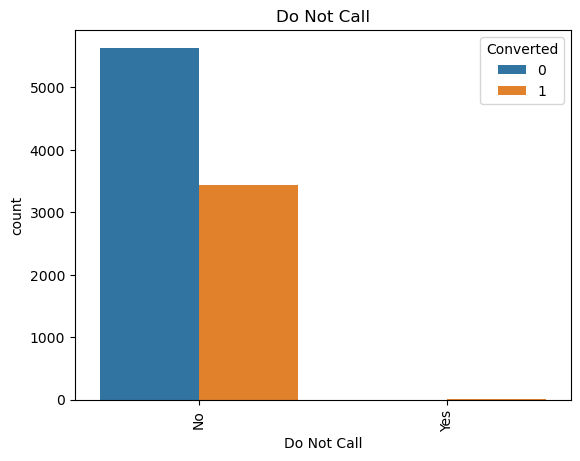

In [39]:
var_col_4 = ["Do Not Email", "Do Not Call"]

for x in var_col_4:
    sns.countplot(data = df, hue = "Converted", x = x)
    plt.xticks(rotation = 90)
    plt.title(x)
    plt.show()

- Numeric Variables

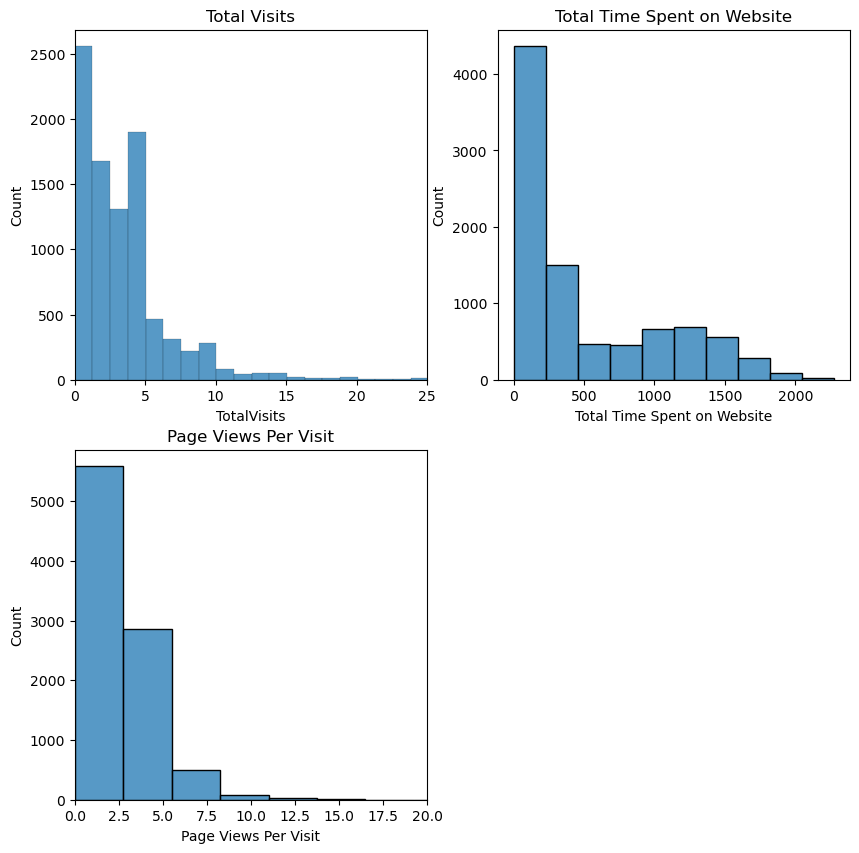

In [40]:
# Printing histogram for all the numeric variables except "Converted" as it is the Target Variable

plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.histplot(df['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(2,2,2)
sns.histplot(df['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(2,2,3)
sns.histplot(df['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()
    

- From the above performed EDA we can infer that there are lot of columns with too less data which in turn won't of great help in our data modeling

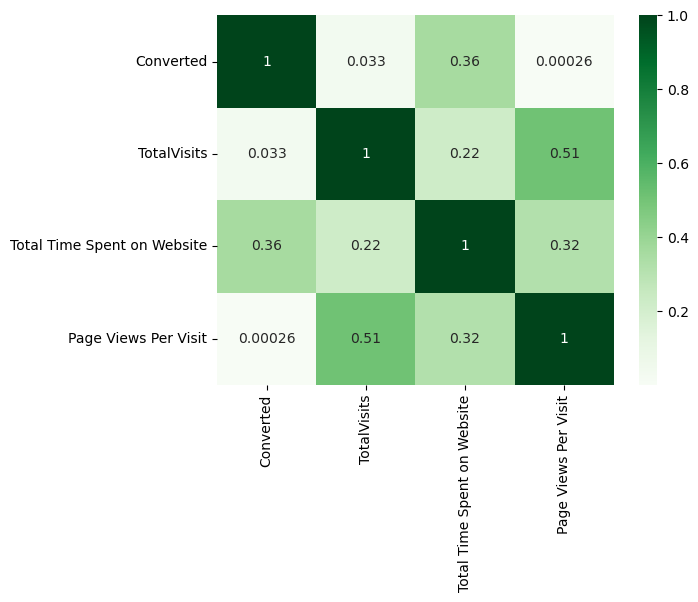

In [41]:
# Checking for correlations between different continuous variables using heatmap

sns.heatmap(df.corr(), annot = True, cmap= "Greens")
plt.show()

In [42]:
# Creating a df with only numerical variables

num_var = [x for x in df.select_dtypes(exclude = "object").columns]
num_var = [x for x in num_var if x not in "Converted"]
num_df = df[[x for x in num_var]]

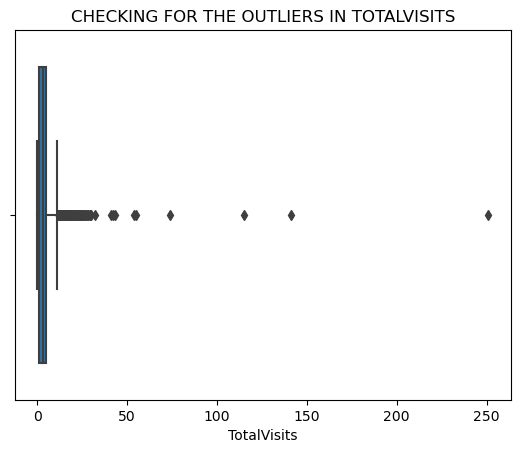

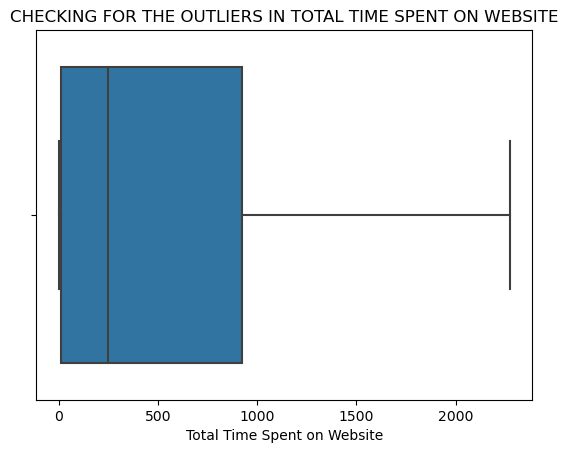

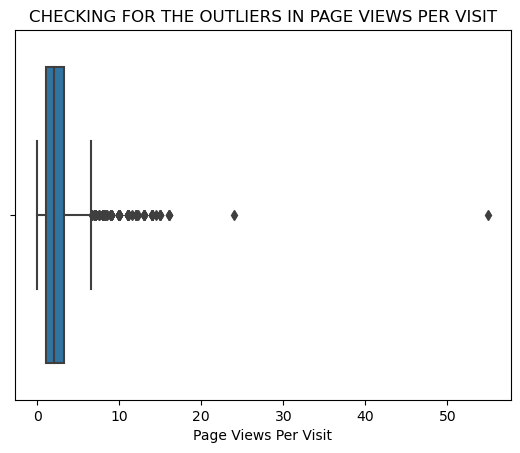

In [43]:
# Now let's check for the outliers

for x in num_var:
    sns.boxplot(data = df, x = x)
    plt.title("Checking for the outliers in ".upper()+ x.upper())
    plt.show()

In [44]:
# Checking for outliers with the help of percentile

num_df.describe(percentiles = [0.5, 0.75, 0.95, 0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


- We can see a presence of outliers in the TotalVisits column so we will deal with it by removing top 1% and bottom 1% of the values from the column

In [45]:
# Treating outliers in the column "TotalVisits"

Quar_3 = df["TotalVisits"].quantile(0.99)
Quar_1 = df["TotalVisits"].quantile(0.01)

df = df[(df.TotalVisits<= Quar_3) & (df.TotalVisits >= Quar_1)]

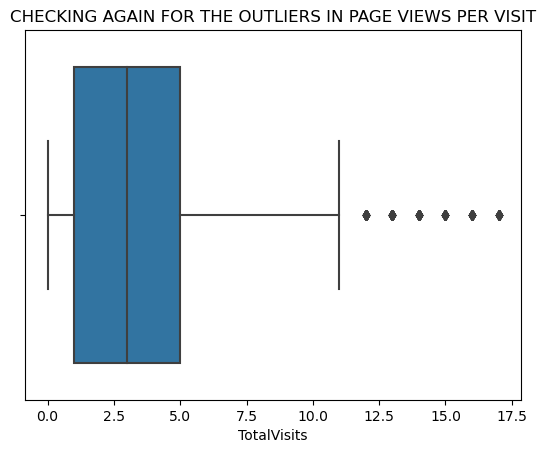

In [46]:
# Let's check the boxplot of the column "TotalVisits" again to see the difference

sns.boxplot(data = df, x = "TotalVisits")
plt.title("Checking again for the outliers in ".upper()+ x.upper())
plt.show()

- We can see there's a significant inprovement in the data quality just by treating the outliers in the "TotalVisits" column

    - In dealing with these outliers there's only a miniscule amount of entry loss from the data to be specific 0.9% of entry loss so it's no big deal and won't hinder our model building.

- Let's drop few columns based on what we have observed

In [47]:
# Creating a list of Columns that can be dropped on the basis of what we've observed so far using the help of EDA and so on.

drop_columns = ["Tags", "Country", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement"]


In [48]:
# Deleting the above listed columns


df.drop(drop_columns, axis = 1, inplace = True)

In [49]:
# Checking shape of the dataset after dropping the above columns

df.shape

(8991, 17)

## *4) Creating Dummy Variables*

In [50]:
# Let's create a list of object type variables

cat_var = [x for x in df.select_dtypes(include = "object").columns]

cat_var

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Through Recommendations',
 'City',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [51]:
# Let's now create dummy variables

dummy_var = pd.get_dummies(df[[x for x in cat_var]], drop_first = True)

In [52]:
# Concatinating the main df with dummy_var dataframe

df = pd.concat([df, dummy_var], axis = 1)


In [53]:
# Dropping columns for which we've already created dummy variables

df.drop(cat_var, axis = 1, inplace = True)

In [54]:
# Checking for the df head again after creating dummy variables and dropping columns for which we have created dummy vars

df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Mentioned,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Mentioned,What matters most to you in choosing a course_Other,Search_Yes,Through Recommendations_Yes,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

## *5) Performing Train-Test Split*

In [55]:
# Putting Feature variable to X

# Importing necessary library

from sklearn.model_selection import train_test_split

X = df.drop("Converted", axis = 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Mentioned,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Mentioned,What matters most to you in choosing a course_Other,Search_Yes,Through Recommendations_Yes,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [56]:
# Putting response variable to y

y = df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y , test_size= 0.3, train_size= 0.7, random_state= 100)

## *5) Feature Scaling*

In [58]:
# Importing the necessary library

from sklearn.preprocessing import StandardScaler


In [59]:
# Scaling the values from the necessary columns

scaler = StandardScaler()

X_train[[x for x in num_var]] = scaler.fit_transform(X_train[[x for x in num_var]])

In [60]:
# Checking the X_train dataset head after scaling

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Mentioned,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Mentioned,What matters most to you in choosing a course_Other,Search_Yes,Through Recommendations_Yes,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1467,0.246579,0.764873,0.777363,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
108,0.908719,-0.148599,0.298183,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7858,2.564067,-0.649536,-0.554758,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5220,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3871,-1.077699,-0.881587,-1.139357,0,0,0,0,0,0,0

In [61]:
# Checking for the conversion rate of the leads

df.Converted.sum()/df.shape[0]*100

37.80447113780447

- The lead conversion rate is approximately 38%

## *6) Checking Correlations*

In [62]:
# Checking for Correlations using corr_matrix

corr_matrix = df.corr()
corr_matrix.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Mentioned,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Not Mentioned,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Not Mentioned,What matters most to you in choosing a course_Other,Search_Yes,Through Recommendations_Yes,City_Not Mentioned,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.048804,0.358676,0.001924,-0.037622,0.302273,-0.009313,-0.072410,-0.010641,0.029367,0.019132,0.013528,-0.124505,-0.002288,-0.008223,-0.011629,0.256640,-0.030606,0.003752,0.013528,0.150895,-0.011265,-0.008223,-0.018391,-0.008223,-0.008223,-0.008223,-0.138987,0.019132,-0.116130,-0.127492,-0.037308,0.019132,-0.024645,0.019132,-0.031588,0.044130,-0.210495,-0.079456,0.013528,0.337902,-0.011576,-0.023592,-0.018391,-0.008223,0.022919,-0.000497,-0.005393,0.043615,0.028408,0.005854,0.050146,0.002062,-0.006293,0.068401,0.010554,-0.160951,0.044276,-0.005929,0.009230,-0.014206,0.019555,-0.008578,0.040602,-0.321195,0.012589,-0.006914,0.127800,0.315925,0.013528,-0.323983,-0.008223,0.000516,0.024263,-0.080697,0.012509,0.028310,0.011940,0.044187,-0.006638,-0.031347,-0.037796,-0.033529,0.019132,-0.015182,0.013528,-0.008223,0.042771,-0.263852,-0.072974,-0.032843,0.013528,0.362191,0.038141,-0.

- <span style = "color:Red;"> Since there are too many variables it is really dificult to draw any inference</span>

## *7) Model Building*

In [63]:
# Importing "LogisticRegression"

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [64]:
from sklearn.feature_selection import RFE

rfe = RFE(logreg, n_features_to_select= 15)
rfe = rfe.fit(X_train, y_train)

In [65]:
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False])

In [66]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 47),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 48),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Source_Direct Traffic', False, 21),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 51),
 ('Lead Source_NC_EDM', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 22),
 ('Lead Source_Pay per Click Ads', False, 80),
 ('Lead Source_Press_Release', False, 65),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Social Media', False, 33),
 ('Lead Source_WeLearn', False, 46),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 78),
 ('Lead Source_blog', False, 67),
 ('Lead Source_google', False, 37),
 ('Lead Source_testone', False, 41),
 ('Lead Source_welearnblog_Home', False, 54),
 

In [67]:
tr_col = X_train.columns[rfe.support_]

In [68]:
tr_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not Mentioned',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## <span style = "color :Teal;"> >> Building our 1st Model <span/>

In [69]:
# Importing necessary library

import statsmodels.api as sm

In [70]:
X_train_sm = sm.add_constant(X_train[tr_col])
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2527.0
Date:                Fri, 14 Apr 2023   Deviance:                       5054.1
Time:                        06:46:49   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4062
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                           0.3568      0.071      4.994      0.000       0.217       0.497
Total Time Spent on Website                                     1.1211      0.041     27.501      0.000       1.041       1.201
Lead Origin_Lead Add Form                                       2.3476      0.881      2.663      0.008       0.620       4.075
Lead Source_Olark Chat                                          1.3720      0.107     12.816      0.000       1.162       1.582
Lead Source_Reference                                           1.8629      0.918      2.030      0.042       0.064       3.662
Lead Source_Welingak Website                                    4.1228      1.345      3.065      0.002       1.487       6.759
Do Not Email_Yes                                               -1.8222      0.177    -10.314      0.000      -2.168      -1.476
Last Activity_Had a Phone Conversation                          1.5294      0.647      2.365      0.018       0.262       2.797
Last Activity_Olark Chat Conversation                          -1.1046      0.194     -5.696      0.000      -1.485      -0.724
What is your current occupation_Working Professional            2.5441      0.192     13.285      0.000       2.169       2.919
What matters most to you in choosing a course_Not Mentioned    -1.0944      0.088    -12.386      0.000      -1.268      -0.921
Last Notable Activity_Email Link Clicked                       -1.7597      0.257     -6.836      0.000      -2.264      -1.255
Last Notable Activity_Email Opened                             -1.4077      0.090    -15.668      0.000      -1.584      -1.232
Last Notable Activity_Modified                                 -1.7660      0.099    -17.866      0.000      -1.960      -1.572
Last Notable Activity_Olark Chat Conversation                  -1.6639      0.388     -4.294      0.000      -2.424      -0.904
Last Notable Activity_Page Visited on Website                  -1.4259      0.208     -6.843      0.000      -1.834      -1.017
===============================================================================================================================
"""

In [71]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.977210
108     0.024775
7858    0.408189
5220    0.412403
3871    0.146573
686     0.495007
1694    0.107163
2180    0.042440
6845    0.146573
191     0.033840
dtype: float64

In [73]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97721002, 0.02477517, 0.40818908, 0.41240273, 0.14657328,
       0.49500723, 0.10716319, 0.04244036, 0.14657328, 0.03384048])

In [74]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.977210,1467
1,0,0.024775,108
2,1,0.408189,7858
3,1,0.412403,5220
4,0,0.146573,3871


In [75]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the dataframe head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.977210,1467,1
1,0,0.024775,108,0
2,1,0.408189,7858,0
3,1,0.412403,5220,0
4,0,0.146573,3871,0


In [76]:
# Importing necessary library

from sklearn import metrics

# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8158271094867313


In [77]:
# Let's make a Vif Dataframe
vif = pd.DataFrame()
vif['Features'] = X_train[tr_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[tr_col].values, i) for i in range(X_train[tr_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,43.33
3,Lead Source_Reference,33.94
4,Lead Source_Welingak Website,10.47
7,Last Activity_Olark Chat Conversation,1.93
2,Lead Source_Olark Chat,1.69
12,Last Notable Activity_Modified,1.69
9,What matters most to you in choosing a course_...,1.59
13,Last Notable Activity_Olark Chat Conversation,1.34
11,Last Notable Activity_Email Opened,1.24
0,Total Time Spent on Website,1.23


- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'Lead Origin_Lead Add Form' has the highest VIF. So let's start by dropping that.

In [78]:
# Dropping column with highest VIF value

tr_col = tr_col.drop('Lead Origin_Lead Add Form', 1)
tr_col

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not Mentioned',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

## <span style = "color :Teal;"> >> Building our 2nd Model <span/>

In [79]:
# Let's re-run the model after making the subtle change

X_train_sm = sm.add_constant(X_train[tr_col])
logm2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2531.3
Date:                Fri, 14 Apr 2023   Deviance:                       5062.5
Time:                        06:46:49   Pearson chi2:                 6.52e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4054
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
const                                                           0.3635      0.071      5.094      0.000       0.224       0.503
Total Time Spent on Website                                     1.1174      0.041     27.469      0.000       1.038       1.197
Lead Source_Olark Chat                                          1.3676      0.107     12.799      0.000       1.158       1.577
Lead Source_Reference                                           4.2005      0.270     15.568      0.000       3.672       4.729
Lead Source_Welingak Website                                    6.4613      1.019      6.338      0.000       4.463       8.459
Do Not Email_Yes                                               -1.8258      0.177    -10.340      0.000      -2.172      -1.480
Last Activity_Had a Phone Conversation                          1.5239      0.647      2.357      0.018       0.257       2.791
Last Activity_Olark Chat Conversation                          -1.1069      0.194     -5.710      0.000      -1.487      -0.727
What is your current occupation_Working Professional            2.5374      0.191     13.254      0.000       2.162       2.913
What matters most to you in choosing a course_Not Mentioned    -1.1000      0.088    -12.460      0.000      -1.273      -0.927
Last Notable Activity_Email Link Clicked                       -1.7631      0.257     -6.852      0.000      -2.267      -1.259
Last Notable Activity_Email Opened                             -1.4051      0.090    -15.654      0.000      -1.581      -1.229
Last Notable Activity_Modified                                 -1.7663      0.099    -17.881      0.000      -1.960      -1.573
Last Notable Activity_Olark Chat Conversation                  -1.6623      0.387     -4.292      0.000      -2.421      -0.903
Last Notable Activity_Page Visited on Website                  -1.4124      0.207     -6.816      0.000      -1.818      -1.006
===============================================================================================================================
"""

In [80]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1467    0.977148
108     0.024802
7858    0.410401
5220    0.412414
3871    0.146902
686     0.496486
1694    0.107139
2180    0.042560
6845    0.146902
191     0.033963
dtype: float64

In [81]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.9771485 , 0.02480187, 0.41040091, 0.41241381, 0.14690187,
       0.49648559, 0.10713902, 0.04256043, 0.14690187, 0.03396259])

In [82]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustID
0,1,0.977148,1467
1,0,0.024802,108
2,1,0.410401,7858
3,1,0.412414,5220
4,0,0.146902,3871


In [83]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Checking the dataframe head
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted
0,1,0.977148,1467,1
1,0,0.024802,108,0
2,1,0.410401,7858,0
3,1,0.412414,5220,0
4,0,0.146902,3871,0


In [84]:
# Let's check the overall accuracy agian

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8153503893214683


In [85]:
# Let's make a Vif Dataframe again
vif = pd.DataFrame()
vif['Features'] = X_train[tr_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[tr_col].values, i) for i in range(X_train[tr_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.93
1,Lead Source_Olark Chat,1.69
11,Last Notable Activity_Modified,1.69
8,What matters most to you in choosing a course_...,1.59
12,Last Notable Activity_Olark Chat Conversation,1.34
10,Last Notable Activity_Email Opened,1.24
0,Total Time Spent on Website,1.23
2,Lead Source_Reference,1.15
7,What is your current occupation_Working Profes...,1.14
4,Do Not Email_Yes,1.12


## <span style = "color : Green;"> WE WILL FINALIZE THE MODEL 2 <span/>
    
- Because the accuracy in the both the models are same, to be specific which is around 81.5%
- Moreover we can see that in the model 2 there's no high VIF value i.e. all the features turn out to have VIF less then 2.5
- We can also see the p-value for all the features are less than 0.05

## *8) Checking the confusion matrix*

In [86]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3497,  429],
       [ 733, 1634]], dtype=int64)

In [87]:
# Assigning the values to "True positives", "True Negatives" and so on

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity -".upper(), TP / float(TP+FN))

SENSITIVITY - 0.6903253062948881


In [89]:
# Let us calculate specificity
print("Specificity -".upper(), TN / float(TN+FP))

SPECIFICITY - 0.890728476821192


In [90]:
# Calculate false postive rate - predicting customer as a converted lead when it was actually not a converted lead
print("false positive rate -".upper(), FP/ float(TN+FP))

FALSE POSITIVE RATE - 0.10927152317880795


In [91]:
# positive predictive value 
print ("positive predictive value -".upper(), TP / float(TP+FP))

POSITIVE PREDICTIVE VALUE - 0.7920504120213282


In [92]:
# Negative predictive value
print("Negative predictive value -".upper(),TN / float(TN+ FN))

NEGATIVE PREDICTIVE VALUE - 0.8267139479905438


## *9) Plotting the ROC Curve*

An ROC curve illustrates two important aspects:

- It indicates the relationship between sensitivity and specificity. This means that as the sensitivity of the test increases, the specificity decreases, and vice versa.
- The curve's position in the ROC space reflects the test's accuracy. A curve that follows the left and top borders of the space more closely is considered more accurate. Conversely, a curve that deviates significantly from the diagonal line indicates that the test is less accurate.

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

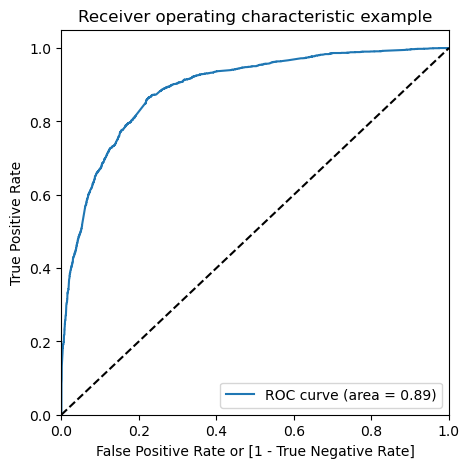

In [95]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

## *10) Finding Optimal Cutoff Point*

- The optimal cutoff probability is the probability threshold at which the sensitivity and specificity of a classification model are balanced, meaning they are equal or as close to equal as possible. This threshold is chosen to maximize the accuracy of the model in correctly classifying the positive and negative cases. At the optimal cutoff probability, the model achieves a balance between correctly identifying true positives and avoiding false positives.

In [96]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.977148,1467,1,1,1,1,1,1,1,1,1,1,1
1,0,0.024802,108,0,1,0,0,0,0,0,0,0,0,0
2,1,0.410401,7858,0,1,1,1,1,1,0,0,0,0,0
3,1,0.412414,5220,0,1,1,1,1,1,0,0,0,0,0
4,0,0.146902,3871,0,1,1,0,0,0,0,0,0,0,0


In [97]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376132  1.000000  0.000000
0.1   0.1  0.597330  0.972962  0.370861
0.2   0.2  0.770539  0.910435  0.686195
0.3   0.3  0.808676  0.865230  0.774580
0.4   0.4  0.817257  0.776933  0.841569
0.5   0.5  0.815350  0.690325  0.890728
0.6   0.6  0.808200  0.619772  0.921803
0.7   0.7  0.780550  0.498944  0.950331
0.8   0.8  0.764977  0.424588  0.970199
0.9   0.9  0.718894  0.271229  0.988793


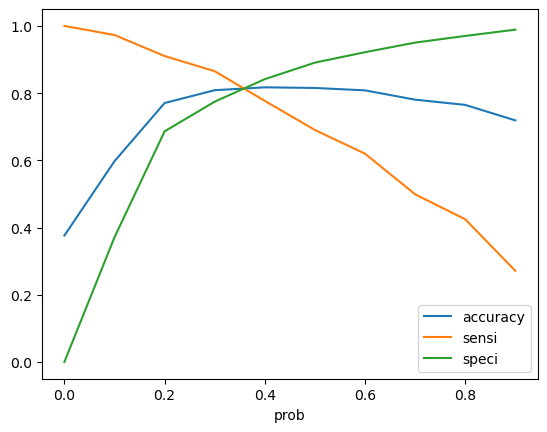

In [98]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### <span style = "color : Teal;"> From the curve above we can infer 0.35 is the optimum point to take it as a cutoff probability <span>

In [99]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.977148,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.024802,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.410401,7858,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.412414,5220,0,1,1,1,1,1,0,0,0,0,0,1
4,0,0.146902,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [100]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8105831876688384

In [101]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3182,  744],
       [ 448, 1919]], dtype=int64)

In [102]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [103]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity -".upper(), TP / float(TP+FN))

SENSITIVITY - 0.810730882974229


In [104]:
# Let us calculate specificity
print("Specificity -".upper(), TN / float(TN+FP))

SPECIFICITY - 0.8104941416199695


In [105]:
# Calculate false postive rate - predicting customer as a converted lead when it was actually not a converted lead
print("false positive rate -".upper(), FP/ float(TN+FP))

FALSE POSITIVE RATE - 0.18950585838003056


In [106]:
# positive predictive value 
print ("positive predictive value -".upper(), TP / float(TP+FP))

POSITIVE PREDICTIVE VALUE - 0.7206158467893353


In [107]:
# Negative predictive value
print("Negative predictive value -".upper(),TN / float(TN+ FN))

NEGATIVE PREDICTIVE VALUE - 0.8765840220385674


## <span style = "color : Teal;"> We can set out cutoff value as 0.35 <span/>
    
- Because after setting cutoff value as 0.35 we are getting sensitivity as 0.81807 and specificity value as 0.8104
- That being said we can easily infer that after setting cutoff value as 0.35 there's hardly any difference in the values of sensitivity and specificity which inturn is a good sign

## *11) Prediction of Test Set*

In [108]:
# Scaling numeric values in the test data set

X_test[[x for x in num_var]] = scaler.transform(X_test[[x for x in num_var]])

In [109]:
# Checking the X_test dataset head

X_test = X_test[tr_col]
X_test.head()

,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What matters most to you in choosing a course_Not Mentioned,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
8692,-0.321717,0,0,0,0,0,0,0,0,0,0,0,0,0
6126,-0.881587,0,1,0,0,0,0,0,0,0,0,0,0,0
5198,-0.098874,0,0,0,0,0,0,0,1,0,1,0,0,0
4979,0.704098,0,0,0,0,0,0,0,0,0,0,0,0,0
9225,-0.745303,0,0,0,1,0,0,0,0,0,0,1,0,0


In [110]:
X_test_sm = sm.add_constant(X_test)

In [111]:
y_test_pred = res.predict(X_test_sm)

In [112]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.501001
1,1,0.972850
2,1,0.095172
3,1,0.759562
4,0,0.016933


In [113]:
# Making prediction using cut off 0.35

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.501001,1
1,1,0.972850,1
2,1,0.095172,0
3,1,0.759562,1
4,0,0.016933,0


In [114]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.799110452186805

In [115]:
# Creating confusion matrix 

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1319,  347],
       [ 195,  837]], dtype=int64)

In [116]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity -".upper(), TP / float(TP+FN))

SENSITIVITY - 0.811046511627907


In [118]:
# Let us calculate specificity

print("Specificity -".upper(), TN / float(TN+FP))

SPECIFICITY - 0.7917166866746699


In [119]:
# Calculate false postive rate - predicting customer as a converted lead when it was actually not a converted lead

print("false positive rate -".upper(), FP/ float(TN+FP))

FALSE POSITIVE RATE - 0.20828331332533012


In [120]:
# positive predictive value 
print ("positive predictive value -".upper(), TP / float(TP+FP))

POSITIVE PREDICTIVE VALUE - 0.7069256756756757


In [121]:
# Negative predictive value
print("Negative predictive value -".upper(),TN / float(TN+ FN))

NEGATIVE PREDICTIVE VALUE - 0.8712021136063408


- With the cutoff of 0.35 which we did set using optimal cutoff point, we got accuracy, specificity, sensitivity of approx 80%, 81% and 81% respectively

## *12) Precision and Recall*

In [122]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3497,  429],
       [ 733, 1634]], dtype=int64)

In [123]:
# Importing necessary library

from sklearn.metrics import precision_score, recall_score

In [124]:
# Checking for precision score

print("precision -".upper(), precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

PRECISION - 0.7920504120213282


In [125]:
# Checking for recall score

print("recall -".upper(), recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

RECALL - 0.6903253062948881


## <span style = "color : Green;"> >> With 0.5 as cut off we have a precision and recall value of 0.79 and 0.69 respectively <span>

### <span style = "color : Maroon;"> *Precision and Recall Tradeoff*<span>

In [126]:
# Importing necessary library

from sklearn.metrics import precision_recall_curve

In [127]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6288    0
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6288    0
 6289    1
 6290    0
 6291    0
 6292    1
 Name: predicted, Length: 6293, dtype: int64)

In [128]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

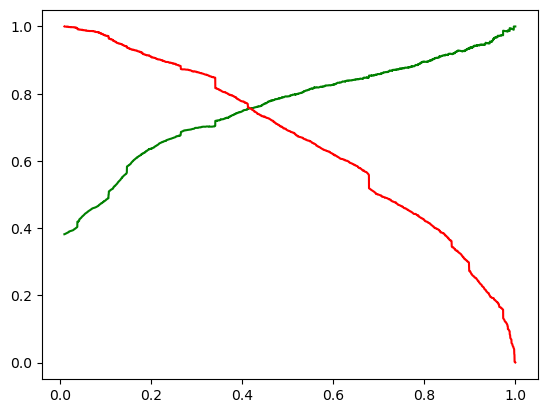

In [129]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [130]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.977148,1467,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.024802,108,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.410401,7858,0,1,1,1,1,1,0,0,0,0,0,0
3,1,0.412414,5220,0,1,1,1,1,1,0,0,0,0,0,0
4,0,0.146902,3871,0,1,1,0,0,0,0,0,0,0,0,0


In [131]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8167805498172572

In [132]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3353,  573],
       [ 580, 1787]], dtype=int64)

In [133]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [134]:
# Calculating Precision

print("precision -".upper(),TP / (TP + FP))

PRECISION - 0.7572033898305085


In [135]:
# Calculating Recall

print("recall -".upper(),TP / (TP + FN))

RECALL - 0.7549640895648501


## <span style = "color : Green;"> >> With 0.42 as cut off we have a precision and recall value of 75.7% and 75.4% respectively on the train dataset <span>

## *13) Making Predictions on The Test Set*

In [136]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.501001
1,1,0.972850
2,1,0.095172
3,1,0.759562
4,0,0.016933


In [137]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.501001,1
1,1,0.972850,1
2,1,0.095172,0
3,1,0.759562,1
4,0,0.016933,0
...,...,...,...
2693,0,0.665220,1
2694,1,0.275616,0
2695,0,0.340932,0
2696,0,0.151463,0


In [138]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8054114158636027

In [139]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1391,  275],
       [ 250,  782]], dtype=int64)

In [140]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [141]:
# Calculating Precision

print("precision -".upper(),TP / (TP + FP))

PRECISION - 0.7398297067171239


In [142]:
# Calculating Recall

print("recall -".upper(),TP / (TP + FN))

RECALL - 0.7577519379844961


## <span style = "color : Green;"> >> With 0.42 as cut off we have a precision and recall value of 74% and 76% respectively on the test dataset <span>

In [143]:
# Checking for the list of significant features and their importance in the predictive model

print(tr_col)
print()
print("-"*30, "Feature Importance", "-"*40)
print()
print(res.params)

Index(['Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Not Mentioned',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

------------------------------ Feature Importance ----------------------------------------

const                                                          0.363500
Total Time Spent on Website                                    1.117426
Lead Source_Olark Chat                                         1.367579
Lead Source_Reference                           

# <u><span style = "color : Blue;">Conclusion<u>

### <span style = "color : Teal;">  The Variables which are most significant in deciding if the lead is a potential buyer or not are as follows :- <span/> 
    

    
<span style = "color : Maroon;">     1) Total Time Spent on Website
    
<span style = "color : Maroon;">     2) When the Lead is a Working Professional
    
<span style = "color : Maroon;">     3) If the lead had a Phone Conversation with the employee from the sales team
    
<span style = "color : Green;">   4) If the lead source was :- <span/>
        
    
<span style = "color : Teal;">        a) Welingak Website
        
<span style = "color : Teal;">        b) Reference